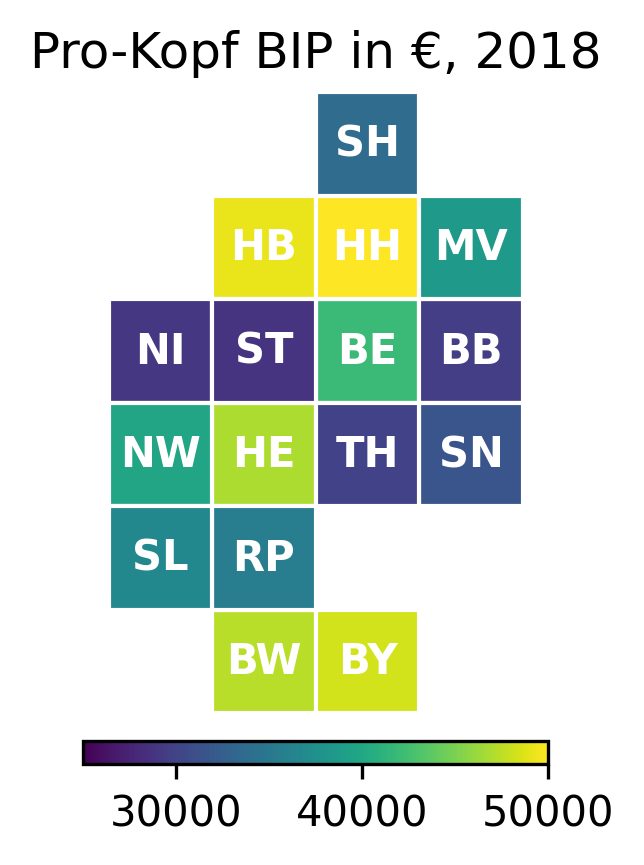

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.cm as cm
import matplotlib.colors as mcolors

states = pd.DataFrame(np.array([
    [ 'BW', 'Baden-Württemberg', 0, 1, 0, 47290 ],
    [ 'BY', 'Bayern', 0, 2, 0, 48323 ],
    [ 'BE', 'Berlin', 3, 2, 0, 41967 ],
    [ 'BB', 'Brandenburg', 3, 3, 1, 29541 ],
    [ 'HB', 'Bremen', 4, 1, 0, 49215 ],
    [ 'HH', 'Hamburg', 4, 2, 0, 66879 ],
    [ 'HE', 'Hessen', 2, 1, 0, 46923 ],
    [ 'MV', 'Mecklenburg-Vorpommern', 4, 3, 1, 38423 ],
    [ 'NI', 'Niedersachsen', 3, 0, 0, 28940 ],
    [ 'NW', 'Nordrhein-Westfalen', 2, 0, 0, 39678 ],
    [ 'RP', 'Rheinland-Pfalz', 1, 1, 0, 35457 ],
    [ 'SL', 'Saarland', 1, 0, 0, 36684 ],
    [ 'SN', 'Sachsen', 2, 3, 1, 31453 ],
    [ 'ST', 'Sachsen-Anhalt', 3, 1, 1, 28800 ],
    [ 'SH', 'Schleswig-Holstein', 5, 2, 0, 33712 ],
    [ 'TH', 'Thüringen', 2, 2, 1, 29883 ]
]),
columns = ['code', 'name', 'row', 'column', 'is_new', 'gdp_per_capita'])

states = states.astype({'row': int, 'column': int, 'is_new': int, 'gdp_per_capita': int})



min_gdp = 25000 # min(states['gdp_per_capita'])
max_gdp = 50000 # max(states['gdp_per_capita'])
fig, axs = plt.subplots(1, figsize=(2, 3), dpi=300)
plt.xlim(0, 4)
plt.ylim(0, 6)
plt.axis('off')
axs.set_aspect('equal')

cmap_type = 'viridis'
cmap = cm.get_cmap(cmap_type)
norm = mcolors.Normalize(vmin=min_gdp, vmax=max_gdp)

for _, state in states.iterrows():
    col = cmap(norm(state.gdp_per_capita))
    box = patches.Rectangle((state.column,state.row),1,1,linewidth=1,edgecolor='white',facecolor=col)
    plt.text(state.column + 0.5, state.row + 0.5, state.code, horizontalalignment='center', verticalalignment='center', color='white', weight='bold')
    axs.add_patch(box)
    
# create a colorbar
sm = cm.ScalarMappable(cmap=cmap_type, norm=norm)
cb = fig.colorbar(sm, orientation='horizontal', fraction=0.046, pad=0.04)

plt.title('Pro-Kopf BIP in €, 2018')
plt.show()

